# I. Exploratory Data Analysis
**by: Duke LeTran**

**date: Fri, February 2nd, 2018**

In [1]:
#Initialize Libraries
import numpy as np
import pandas as pd
import calendar as cal

df = pd.read_csv('datasets/ErinsFitbit2016.csv')

#other misc set-up
ls_month = []
for i in cal.month_name:
    if len(i) == 0:
        continue
    else:
        ls_month.append(i[0:3])


## Question 1

A Fitbit tracker is used to track various data on sleep, and steps. Online you will find the dataset ErinsFitbit2016.csv. This is my Fitbit data for the year 2016. It has the following columns:


|Column | Variable | Description |
|:-----:|:--------:|:-----------:|
| 1     | Month    | The month the data was recorded.|
| 2     | Day      | The day of the week the data was |
| 3     | Steps    | The total number of steps taken for that day |
| 4     | Miles    | The total distance walked in miles for that day |
| 5     | Floors   | The total number of flights of stairs climbed in that day (or the equivalent hill, etc) |
| 6     | Sed      | The total number of “low activity” hours for that day |
| 7     | Active   | The total number of “active” hours for that day |
| 8     | Sleep    | The total number of hours of sleep for the previous night |

In [2]:
for i,j in enumerate(df.columns.tolist()):
    print(i,j)

0 Month
1 Day
2 Steps
3 Miles
4 Floors
5 Sed
6 Active
7 Sleep


### a) Find the overall average for hours of sleep.

In [3]:
df['Sleep'].mean()

7.6122677595628421

### b) Find the overall variance for hours of sleep.

In [4]:
df['Sleep'].var()

1.3107677198892134

### c) Find the overall five number summary for the “active” hours.

In [5]:
df['Active'].describe() #gives you a little more than the five numbers

count    366.000000
mean       4.897623
std        1.653184
min        0.000000
25%        3.740000
50%        5.055000
75%        6.070000
max       10.200000
Name: Active, dtype: float64

### d) Find the number of days per month

In [6]:
df.groupby('Month')['Day'].count().reindex(index=ls_month)

Month
Jan    31
Feb    29
Mar    31
Apr    30
May    31
Jun    30
Jul    31
Aug    31
Sep    30
Oct    31
Nov    30
Dec    31
Name: Day, dtype: int64

## Question 2


In [7]:
#init list for question 2
ls_day = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

### a) Find the average hours of sleep for every day of the week. Is there a particular day where I got more sleep in 2016? If so, which one was it?

In [8]:
df.groupby('Day')['Sleep'].mean().reindex(index=ls_day)

Day
Sun    7.662500
Mon    7.200385
Tue    7.894615
Wed    7.385577
Thu    7.643077
Fri    7.630566
Sat    7.863962
Name: Sleep, dtype: float64

### b) Find the average number of steps for every day of the week. Are there particular days where I stepped more in 2016? If so, which are they?

In [9]:
df.groupby('Day')['Steps'].mean().reindex(index=ls_day)

Day
Sun     6030.884615
Mon    11351.519231
Tue     9518.153846
Wed    10792.711538
Thu     8771.326923
Fri    11370.377358
Sat     8117.886792
Name: Steps, dtype: float64

### c) Find the variance of hours of sleep by month. Which month has the highest variance? Which the lowest?

In [10]:
df.groupby('Month')['Sleep'].var().reindex(index=ls_month)

Month
Jan    1.662749
Feb    2.588058
Mar    0.927096
Apr    0.538976
May    0.767363
Jun    1.288700
Jul    3.155800
Aug    2.589669
Sep    0.558120
Oct    0.729238
Nov    0.435710
Dec    0.598136
Name: Sleep, dtype: float64

### d) Find the standard deviation for the hours of “low activity” days by month. Do you believe there is a month that stands out in some way? Explain.

In [11]:
df.groupby('Month')['Sed'].std().reindex(index=ls_month)

Month
Jan    2.007835
Feb    0.973584
Mar    2.086754
Apr    1.172028
May    1.094034
Jun    1.563836
Jul    1.896349
Aug    1.400490
Sep    1.166336
Oct    2.191055
Nov    1.304348
Dec    3.759295
Name: Sed, dtype: float64

## Question 3

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### a) Make an overall histogram of the number of steps. Does this graph seem skewed?

(array([  1.76558348e-05,   4.63465664e-05,   6.84163599e-05,
          9.15896431e-05,   8.93826637e-05,   4.63465664e-05,
          2.86907316e-05,   9.93140708e-06,   2.20697935e-06,
          3.31046903e-06]),
 array([     0.,   2476.,   4952.,   7428.,   9904.,  12380.,  14856.,
         17332.,  19808.,  22284.,  24760.]),
 <a list of 10 Patch objects>)

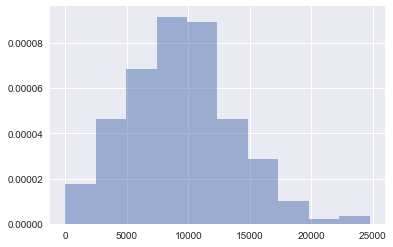

In [13]:
#regular matplotlib
plt.hist(df['Steps'], normed=True, alpha = 0.5)

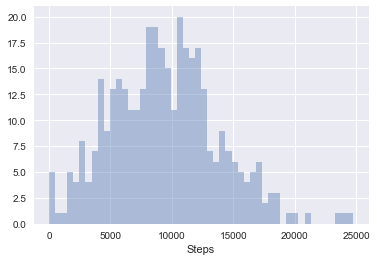

In [14]:
#seaborn histogram
sns.distplot(df['Steps'], hist=True, kde=False, bins=50)

### b) oops

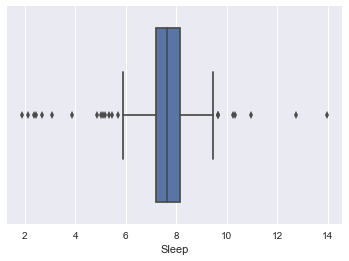

In [15]:
sns.boxplot(x=df['Sleep'])

### c) Plot a scatterplot of the hours of sleep vs. the number of steps overall. Does there appear to be any pattern in this plot? Explain.

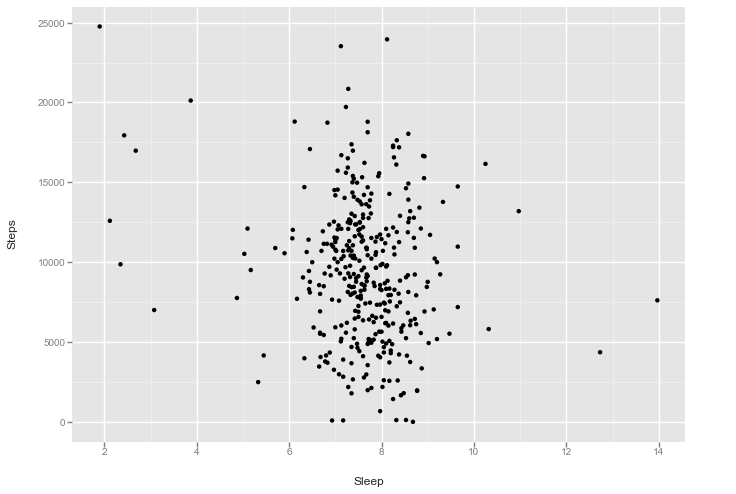

<ggplot: (-9223372036572570389)>

In [22]:
from ggplot import *
ggplot(df, aes(x='Sleep', y='Steps'))\
      + geom_point() #not ggplot style, but more python

d) Plot a barplot of the frequency of the days. Does this look as you would expect? Explain.

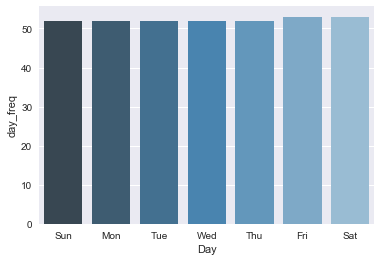

In [50]:
s_freq_days = df.groupby('Day')['Miles'].count().reindex(index=ls_day)
df_freq_days = pd.DataFrame(s_freq_days)
df_freq_days = df_freq_days.rename(columns={'Miles':'day_freq'})
df_freq_days.reset_index(inplace=True)
sns.barplot(x='Day', y='day_freq', palette='Blues_d', data=df_freq_days)

## Question 4

### a) Plot a grouped boxplot of steps by the day of the week. Which day had the least steps (if any)?

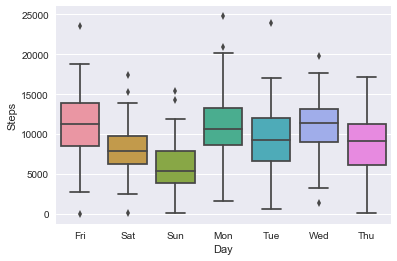

In [51]:
sns.boxplot(x='Day', y='Steps', data=df)

### b) Plot a grouped boxplot of sleep by the month of the year. Which month had the largest spread (if any)?

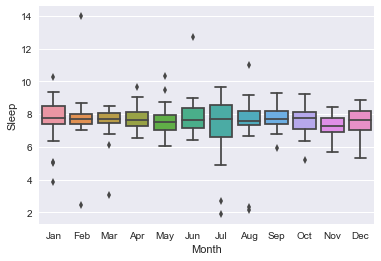

In [53]:
sns.boxplot(x='Month', y='Sleep', data=df)

### c) Plot a grouped boxplot of active hours by day. Are there a group of days that appear to be more active? If so, which ones?

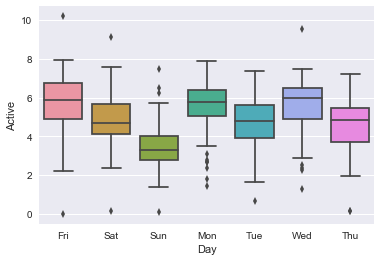

In [54]:
sns.boxplot(x='Day', y='Active', data=df)

### d) Plot a grouped histogram of “low activity” by day. Which day has the lowest “low activity” hours?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1104823c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1107b8048>]], dtype=object)

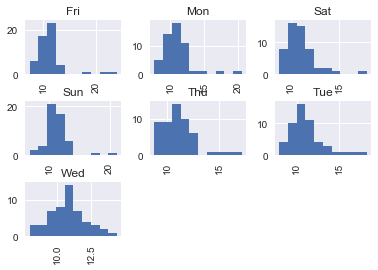

In [65]:
#matplotlib alone (ugly)
df['Sed'].hist(by=df['Day'])

In [84]:
df.groupby('Month')['Sed'].max()

Month
Apr    12.85
Aug    13.68
Dec    24.00
Feb    13.63
Jan    17.72
Jul    18.27
Jun    15.28
Mar    20.52
May    13.12
Nov    14.30
Oct    17.20
Sep    14.42
Name: Sed, dtype: float64

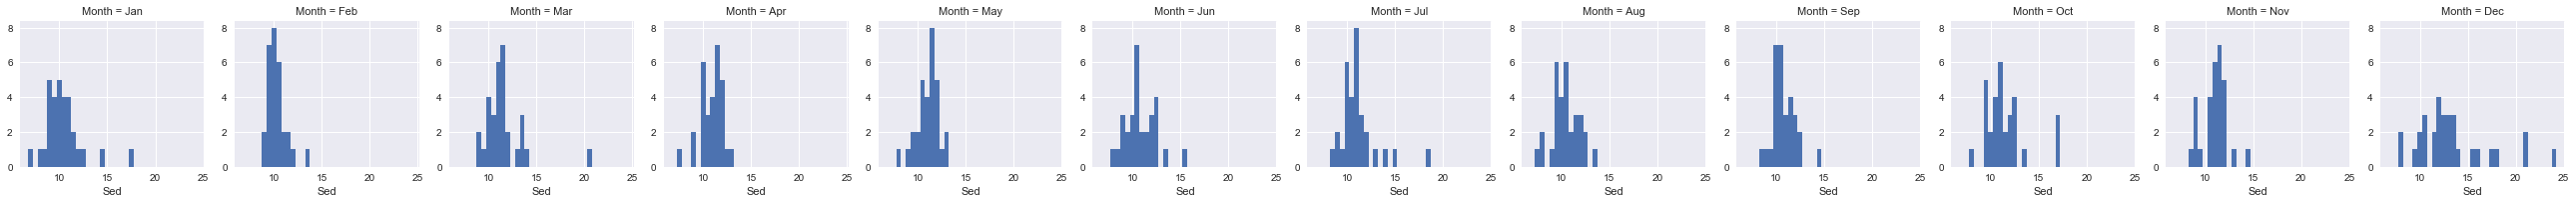

In [91]:
#sns and matplotlib together makes a much nicer "grouped histogram"
g = sns.FacetGrid(df, col='Month')
g = g.map(plt.hist, 'Sed', bins=np.arange(min(df['Sed']),max(df['Sed']) + 0.5, 0.5))